In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [5]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5077,8314-HTWVE,Female,0,Yes,Yes,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,144.15,No
5400,4067-HLYQI,Female,0,No,No,33,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),70.40,2406.1,No
2059,7483-IQWIB,Male,0,Yes,Yes,37,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,92.95,3415.25,No
3289,9626-VFRGG,Female,0,No,Yes,41,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),88.50,3645.05,No
2873,0148-DCDOS,Male,0,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),94.70,2362.1,Yes


In [6]:
#### Data Exploration and Visualization


## We do not need cutomer ID in building our model, so we'll drop this column 
df.drop('customerID', axis='columns', inplace=True)

In [7]:
## To see all the columns along with their datatypes
## The dataset her has a lot of "object" type data (categorical) 
## and we woud need to do label encoding (one-hot encoding) to convert them to numerical 

df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
## TotalCharges has object datatype, which need to be corrected. We want float instead of strings. 
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
## MonthlyCharges is a number 
df.MonthlyCharges.values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [10]:
## To convert the string to TotalCharges column to numbers, while ignoring errors 
## (for example ignoring cells with space: replacing them with N/A or empty string)

pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [25]:
## To see results which has TotalCharges as null(empty) or na {you can use ....isna()}

df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [26]:
## To see how many rows have these null values. 
## This number is small, so we can drop the rows
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].shape

(11, 20)

In [27]:
## To see all the values for each column, in row 488
df.iloc[488]

gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn                                      No
Name: 488, dtype: object

In [28]:
df.iloc[488]['TotalCharges']

' '

In [32]:
## Creating a new dataframe which includes only rows where 'TotalCharges' is not empty

df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

In [33]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [34]:
## Now convert the datattype of the TotalCharges in this new dataframe (df1), which has no errors

df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\okafo\AppData\Local\Temp\ipykernel_2624\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [35]:
## Now we have connverted the TotalCharges datatype to float

df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

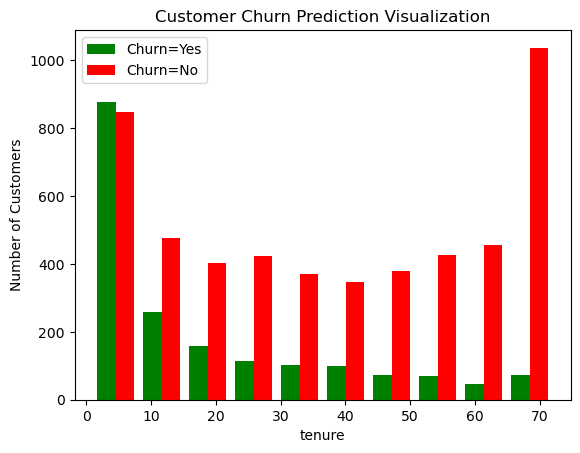

In [36]:
### Some data visualization
### We want to plot a histogram to how the tenure (how long the people have stayed in the company) affets whether they'll leave or not

tenure_churn_no = df1[df1.Churn=='No'].tenure    ## An array of the tenure of those not leaving
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure    ## An array of the tenure of those leaving

plt.xlabel("tenure")
plt.ylabel('Number of Customers')
plt.title ('Customer Churn Prediction Visualization')

plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

## we can do same plot for another feature (e.g. monthly charges)

In [37]:
#### Data Cleansing (Preprocessing)

## To print the columns present 
for column in df:
    print(column)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [40]:
## To see the unique values in each column

for column in df:
    print(df[column].unique())

['Female' 'Male']
[0 1]
['Yes' 'No']
['No' 'Yes']
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [43]:
## To see the unique values in each column ( a more nicer way, and actually using df1)

for column in df1:
    print(f'{column}:{df1[column].unique()}')
    
## many columns have "Yes", "No" type of values

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   

In [46]:
## To print only the columns with categorical variables

for column in df1:
    if df1[column].dtype=='object':
        print(f'{column}:{df1[column].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [47]:
## we want to replace 'No internet service' and 'No phone service' with 'No'

df1.replace('No internet service','No', inplace=True)
df1.replace('No phone service','No', inplace=True)

C:\Users\okafo\AppData\Local\Temp\ipykernel_2624\1200587117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No', inplace=True)
C:\Users\okafo\AppData\Local\Temp\ipykernel_2624\1200587117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace=True)


In [48]:
## To print only the columns with categorical variables

for column in df1:
    if df1[column].dtype=='object':
        print(f'{column}:{df1[column].unique()}')

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [49]:
## we can replace "Yes" and "No" with 1 and 0s 

yes_no_columns = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                 'PaperlessBilling', 'Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)

C:\Users\okafo\AppData\Local\Temp\ipykernel_2624\1455344837.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0}, inplace=True)


In [51]:
## To print unique values of the columns

for column in df1:
    print(f'{column}:{df1[column].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [52]:
## To print only the columns with categorical variables

for column in df1:
    if df1[column].dtype=='object':
        print(f'{column}:{df1[column].unique()}')

gender:['Female' 'Male']
InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [53]:
## we need to replace the gender column with 0 and 1
## If you have two categories, you can just replace with 0 and 1 (you don't need to use hot-encoding)

df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)

C:\Users\okafo\AppData\Local\Temp\ipykernel_2624\2401755432.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace=True)


In [54]:
## To print only the columns with categorical variables

for column in df1:
    if df1[column].dtype=='object':
        print(f'{column}:{df1[column].unique()}')

InternetService:['DSL' 'Fiber optic' 'No']
Contract:['Month-to-month' 'One year' 'Two year']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [57]:
## Since we still have categorical variables with more than two categories, we can use one-hot encoding here. 

df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [58]:
## To print unique values of the columns

for column in df2:
    print(f'{column}:{df2[column].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
PaperlessBilling:[1 0]
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]
InternetService_DSL:[1 0]
InternetService_Fiber optic:[0 1]
InternetService_No:[0 1]
Contract_Month-to-month:[1 0]
Contract_One year:[0 1]
Contract_Two year:[0 1]
PaymentMethod_Bank transfer (automatic):[0 1]
PaymentMethod_Credit card (automatic):[0 1]
PaymentMethod_Electronic check:[1 0]
PaymentMethod_Mailed check:[0 1]


In [59]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [60]:
## Confirm the datatypes

df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [61]:
## Scaling: We need to scale "tenure", 'MonthlyCharges' and "TotalCharges", and for this we use MinMaxScaler.

cols_to_scale = ['tenure', 'MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [62]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
698,0,1,1,1,0.647887,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
6846,1,0,0,0,0.000000,1,1,0,0,1,...,0,1,0,1,0,0,0,0,0,1
4551,0,0,1,1,0.774648,1,1,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [63]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=5)

In [65]:
X_train.shape

(5625, 26)

In [66]:
X_test.shape

(1407, 26)

In [67]:
len(X_train.columns)

26

In [69]:
#### Create your neural network model

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(26,), activation='relu'),  
    #input layers correponds to the number of features (columns in X_train)
    #in this case the first hidden layer also has 20 neurons
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
    #the activation function for the output layer is sigmoid because the output is 1 or 0
])

model.compile(
    optimizer = "adam",
    loss = "binary_crossentropy", # loss is binary_crossentropy because our output is 0 and 1
    metrics = ["accuracy"])


In [71]:
model.fit(X_train,y_train, epochs=20)

Epoch 1/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4108 - accuracy: 0.8030
Epoch 2/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8044
Epoch 3/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8071
Epoch 4/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4057 - accuracy: 0.8091
Epoch 5/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4052 - accuracy: 0.8073
Epoch 6/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4029 - accuracy: 0.8082
Epoch 7/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8089
Epoch 8/20
176/176 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 0.8100
Epoch 9/20
176/176 [==============================] - 0s 1ms/step - loss: 0.3996 - accuracy: 0.8092
Epoch 10/20
176/176 [==============================] - 0s 1ms/step - loss: 0.3988 - accuracy: 0.8114

In [72]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 1ms/step - loss: 0.4469 - accuracy: 0.7783


[0.4469437003135681, 0.778251588344574]

In [76]:
yp = model.predict(X_test)   #predicted values
yp[0:5]

44/44 [==============================] - 0s 935us/step


array([[0.16193941],
       [0.47126704],
       [0.01602112],
       [0.76301575],
       [0.48766983]], dtype=float32)

In [77]:
y[0:5]

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [80]:
## We need to convert our predicted to 0 or 1 (instead of decimal)
y_pred = []
for element in yp:
    if element>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[0:5]

[0, 0, 0, 1, 0]

In [89]:
# or use y_pred = np.round(yp)

y_pred = np.round(yp)
y_pred[0:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [0.]], dtype=float32)

In [83]:
#### Performance of the model

## Precision and Recall

from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       999
           1       0.65      0.52      0.57       408

    accuracy                           0.78      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

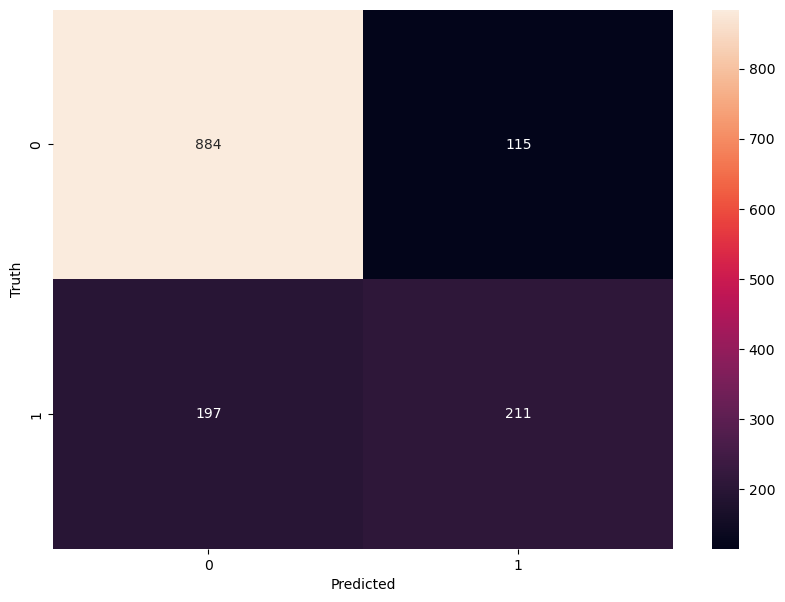

In [84]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Additional Preprocessing Steps

In [121]:
#### Imbalanced datasets

y.value_counts()

# we can see that the labels are not balanced 

0    5163
1    1869
Name: Churn, dtype: int64

In [107]:
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [115]:
df_class_0.shape

(5163, 27)

In [116]:
df_class_1.shape

(1869, 27)

In [117]:
### One way to address imbalance dataset here is to randomly sample the overpopulated dataset
### to a number equal to the minority

df_class_0_under = df_class_0.sample(1869)

In [118]:
### Concatenate the sampled 0 class and the 1 class
### this would giva a new dataframe with same number of classes 

df2_under = pd.concat([df_class_0_under,df_class_1], axis=0)
df2_under.shape

(3738, 27)

In [120]:
### verify that both classes have same number of samples
### And then go ahead to create x and y from this new dataframe

df2_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [132]:
### Another way to address imbalance dataset is to use SMOTE method
### This uses KNN algorithm to generate new samples of the minority class so that it equals the majority class

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

## now we have a balanced dataset to create out train and test dataset

0    5163
1    5163
Name: Churn, dtype: int64